# Проект "Исследование объявлений о продаже квартир"

## Описание проекта <a id='1'> </a>

В данном проекте будут изучены данные сервиса **Яндекс.Недвижимость**, а именно архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

**Задача** — установить параметры, которые позволят построить автоматизированную систему, отслеживающие аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**План исследования**:

1) **[Описание проекта](#1)**
2) **[Обзор данных](#2)**
3) **[Предобработка данных](#3)**
4) **[Дизайн данных](#4)**
5) **[Исследование данных](#5)**
6) **[Вывод](#6)**

**Описание столбцов**:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Обзор данных <a id='2'> </a>

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
#import data
pd.set_option('display.max_columns', 50) 
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t') # Для локального запуска
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # для запуска я Яндекс.Практикуме
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.shape

(23699, 22)

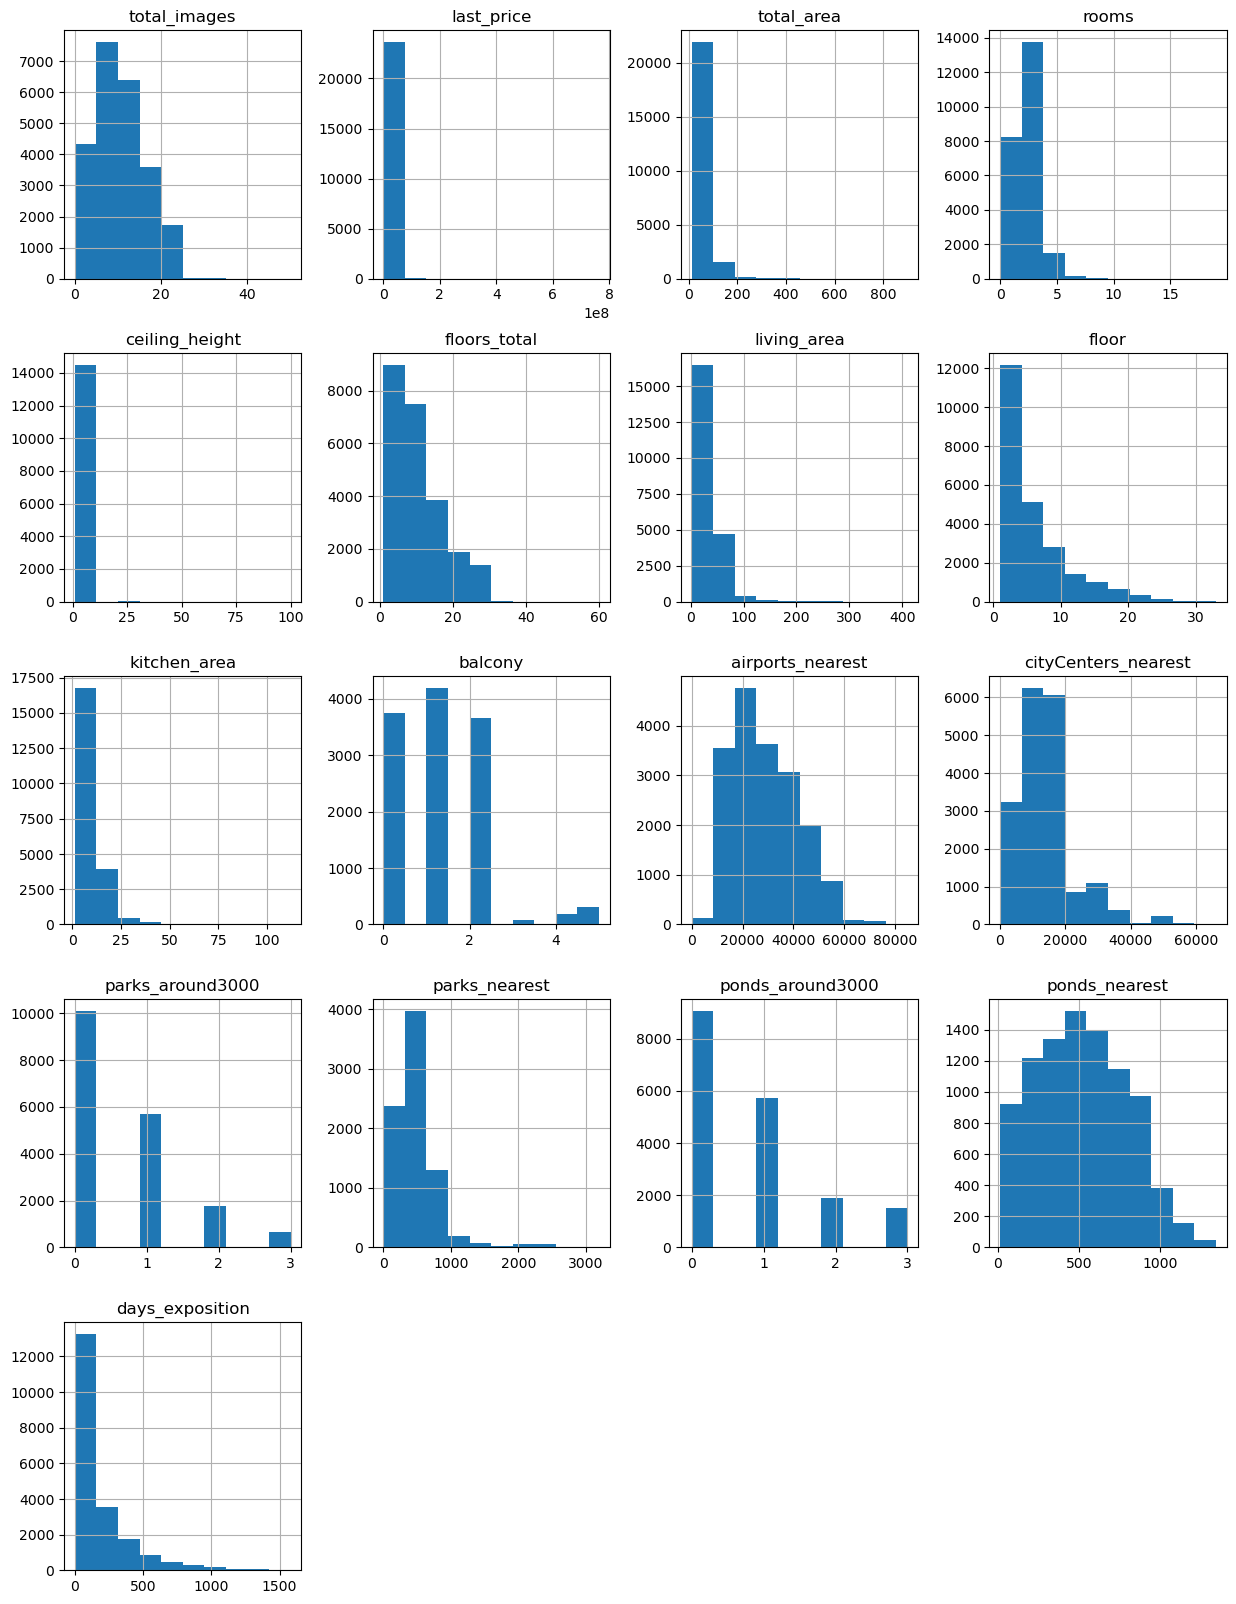

In [5]:
data.hist(figsize=(15, 20))
None

<div class="alert"; style="border-left: 7px solid pink">

**Промежуточный вывод**
- В датасете всего 23699 строк
- Больше, чем в половине всех столбцов имеются пропущенные значения. Столбцы с пропусками:
    - `ceiling_height`
    - `floors_total`
    - `living_area`
    - `is_apartment`
    - `kitchen_area`
    - `balcony`
    - `locality_name`
    - `airports_nearest`
    - `cityCenters_nearest`
    - `parks_around3000`
    - `parks_nearest`
    - `ponds_around3000`
    - `ponds_nearest`
    - `days_exposition`
- Не все столбцы названы правильно: столбцы `cityCenters_neares`,  `parks_around3000`, `ponds_around3000` названы не в нижнем регистре
- Столбец с булевыми значениями `is_apartment` имеет тип `Object`, а не `bool`
</div>

## Предобработка данных <a id=3> </a>

### Пропуски

Посчитаем и выведем количество и процентное соотношение пропусков по всем столбцам, где таковые имеются:

In [6]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        print(f'В столбце "{column}" имеются {data[column].isna().sum()} пропусков, что составляет {round(round(data[column].isna().sum()/len(data), 3)*100, 2)}% от общего количества значений в столбце.')
        print()

В столбце "ceiling_height" имеются 9195 пропусков, что составляет 38.8% от общего количества значений в столбце.

В столбце "floors_total" имеются 86 пропусков, что составляет 0.4% от общего количества значений в столбце.

В столбце "living_area" имеются 1903 пропусков, что составляет 8.0% от общего количества значений в столбце.

В столбце "is_apartment" имеются 20924 пропусков, что составляет 88.3% от общего количества значений в столбце.

В столбце "kitchen_area" имеются 2278 пропусков, что составляет 9.6% от общего количества значений в столбце.

В столбце "balcony" имеются 11519 пропусков, что составляет 48.6% от общего количества значений в столбце.

В столбце "locality_name" имеются 49 пропусков, что составляет 0.2% от общего количества значений в столбце.

В столбце "airports_nearest" имеются 5542 пропусков, что составляет 23.4% от общего количества значений в столбце.

В столбце "cityCenters_nearest" имеются 5519 пропусков, что составляет 23.3% от общего количества значений в 

1) В столбцах `is_apartment`, `balcony`, `parks_around3000` и `ponds_around3000` пропуски могут означать отсутствие данных параметров у квартиры. Заменим их на _False_ для столбца `is_apartment` и на _0_ для столбцов `balcony`, `parks_around3000`, `ponds_around3000`.

2) В столбце `locality_name` присутствует небольшое количетсво пропусков. Учитывая это, а также то, что наименование населенного пункта критично для исследования, удалим строки данных, где есть пропуск в столбце `locality_name`.

Отальные пропуски оставим как есть.

In [7]:
# заменяем пропуски (1)
data[['balcony', 'parks_around3000', 'ponds_around3000']] = \
data[['balcony', 'parks_around3000', 'ponds_around3000']].fillna(0) 
data['is_apartment'] = data['is_apartment'].fillna(False)

# заменяем пропуски (2)
data = data.dropna(subset=['locality_name'])

**Комментарий**  
Пропуски успешно заполнено, где это было возможно. Возможная причиная порпусков - незаполнение продавцом информации при публикации объявления или технические сбои при автоматическом сборе картографических данных о квартирах.

### Типы данных ###

Заметим, что некоторые столбцы имеют некорректный тип данных:

- `is_apartment` ранее имел тип 'Object' вместо 'bool', но после заполнения пропусков проблема была решена;
- `first_day_exposition` имеет тип 'Object', а должен иметь тип данных 'datetime'.

In [8]:
# Приведем значения столбца 'first_day_exposition' к типу 'datetime'

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head() # проверка: значения успешно скорректированы

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

### Дубликаты

Взглянем на потенциальные дубликаты в столбце `locality_name`. Так, в нём встречаются такие неявные дубликаты, как: "поселок Новый Свет" и "посёлок Новый Свет", "посёлок городского типа Рябово" и "поселок Рябово" и т.д.  

Напишем функцию `correct_location`, с помощью которой создадим столбец с корректными значениями.

In [9]:
not_name_words = ['поселок', 'деревня', 'поселок', 'станции', 'поселок', 'городского', 'типа', 'село', 'городской', 'поселок', 'садовое', 'товарищество', 'городской', 'коттеджный', 'при', 'железнодорожной', 'садоводческое', 'некоммерческое']
def correct_location(location):
    try:
        location = location.replace('ё', 'е')
        corrected_name = []
        split_name = location.split(' ')
        for word in split_name:
            if word not in not_name_words:
                corrected_name.append(word)
        return ' '.join(corrected_name)
    except:
        pass

In [10]:
data['locality_name_new'] = data['locality_name'].apply(correct_location)
print(len(data['locality_name'].unique()), len(data['locality_name_new'].unique())) # распечатаем сколько было и
# сколько стало стало уникальных названий населенных пунктов

364 305


In [11]:
data.duplicated().sum() # проверяем, нет ли явных дубликатов

0

**Комментарий**  
Явных дубликатов нет. Схожие названия в столбце `locality_name` скорректированы. Скорректированные названия приведены в столбце `locality_name_new`.

### Редкие и выбивающиеся значения

Взглянем на статистическое описания столбцов. заметим, что есть подозрительно нереалистичные значения в столбцах `ceiling_height`:

In [12]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650,23650.000000,14490.000000,23565.000000,21752.000000,23650.000000,21381.000000,23650.000000,18116.000000,18139.000000,23650.000000,8064.000000,23650.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2017-11-10 00:03:57.463002112,2.070106,2.771287,10.675875,34.448356,5.893277,10.566403,0.591712,28803.225878,14197.860742,0.469091,490.830729,0.590359,518.059879,180.753200
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-15 00:00:00,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26756.500000,13105.000000,0.000000,454.500000,0.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,2018-08-27 00:00:00,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.682278,1.089640e+07,35.661808,NaN,1.078620,1.261593,6.594823,22.037664,4.883317,5.901753,0.959662,12637.314144,8606.830295,0.748458,342.554386,0.883539,277.841733,219.777916


count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
Axes(0.125,0.11;0.775x0.77)


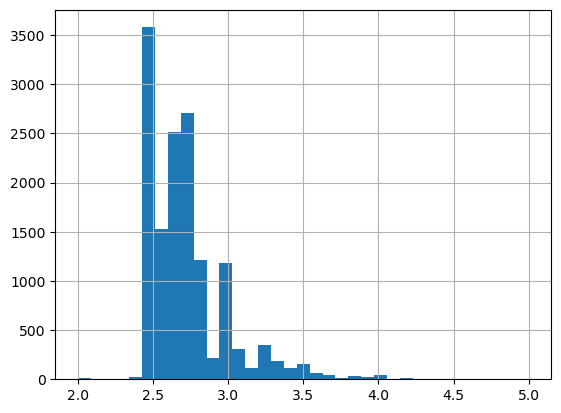

In [13]:
print(data['ceiling_height'].describe())
print(data['ceiling_height'].hist(range=(2, 5), bins = 35))

Будем считать квартиры с потолком больше 5 м. и меньше 2 м. редкими значениями. Квартиры, где высота потолков в данных указана в диапазоне от 25 м до 45 м, скорее всего непраильно описаны и их нужно поделить на 10 объявления, где высота потолков больше 45 м удалим их данных:

In [14]:
# выполним соответствующие вычисления
data.loc[(data['ceiling_height'] <= 45) & (data['ceiling_height'] >= 20), 'ceiling_height'] = data.loc[(data['ceiling_height'] <= 45) & (data['ceiling_height'] >= 25), 'ceiling_height'] / 10
data = data[((data['ceiling_height'] >= 2) & (data['ceiling_height'] <= 5)) | (data['ceiling_height'].isna() == True)]

count    21369.000000
mean        10.563167
std          5.890377
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64
Axes(0.125,0.11;0.775x0.77)


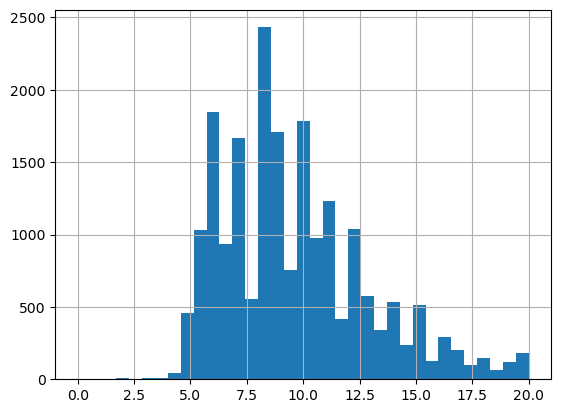

In [15]:
print(data['kitchen_area'].describe())
print(data['kitchen_area'].hist(range=(0, 20), bins = 35))

Будем считать квартиры c кухней больше 45 кв. м. и меньше 4 кв.м. - редкими значениями и удалим их из выборки:

In [16]:
# выполним соответствующие вычисления
data = data[((data.kitchen_area <= 45) & (data.kitchen_area >= 4)) | (data.kitchen_area.isna() == True)]
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


         total_area  parks_nearest  floors_total
count  23533.000000    8002.000000  23449.000000
mean      59.841721     491.427393     10.683569
std       33.435551     342.711214      6.591935
min       12.000000       1.000000      1.000000
25%       40.000000     288.000000      5.000000
50%       52.000000     455.000000      9.000000
75%       69.300000     612.000000     16.000000
max      631.200000    3190.000000     60.000000


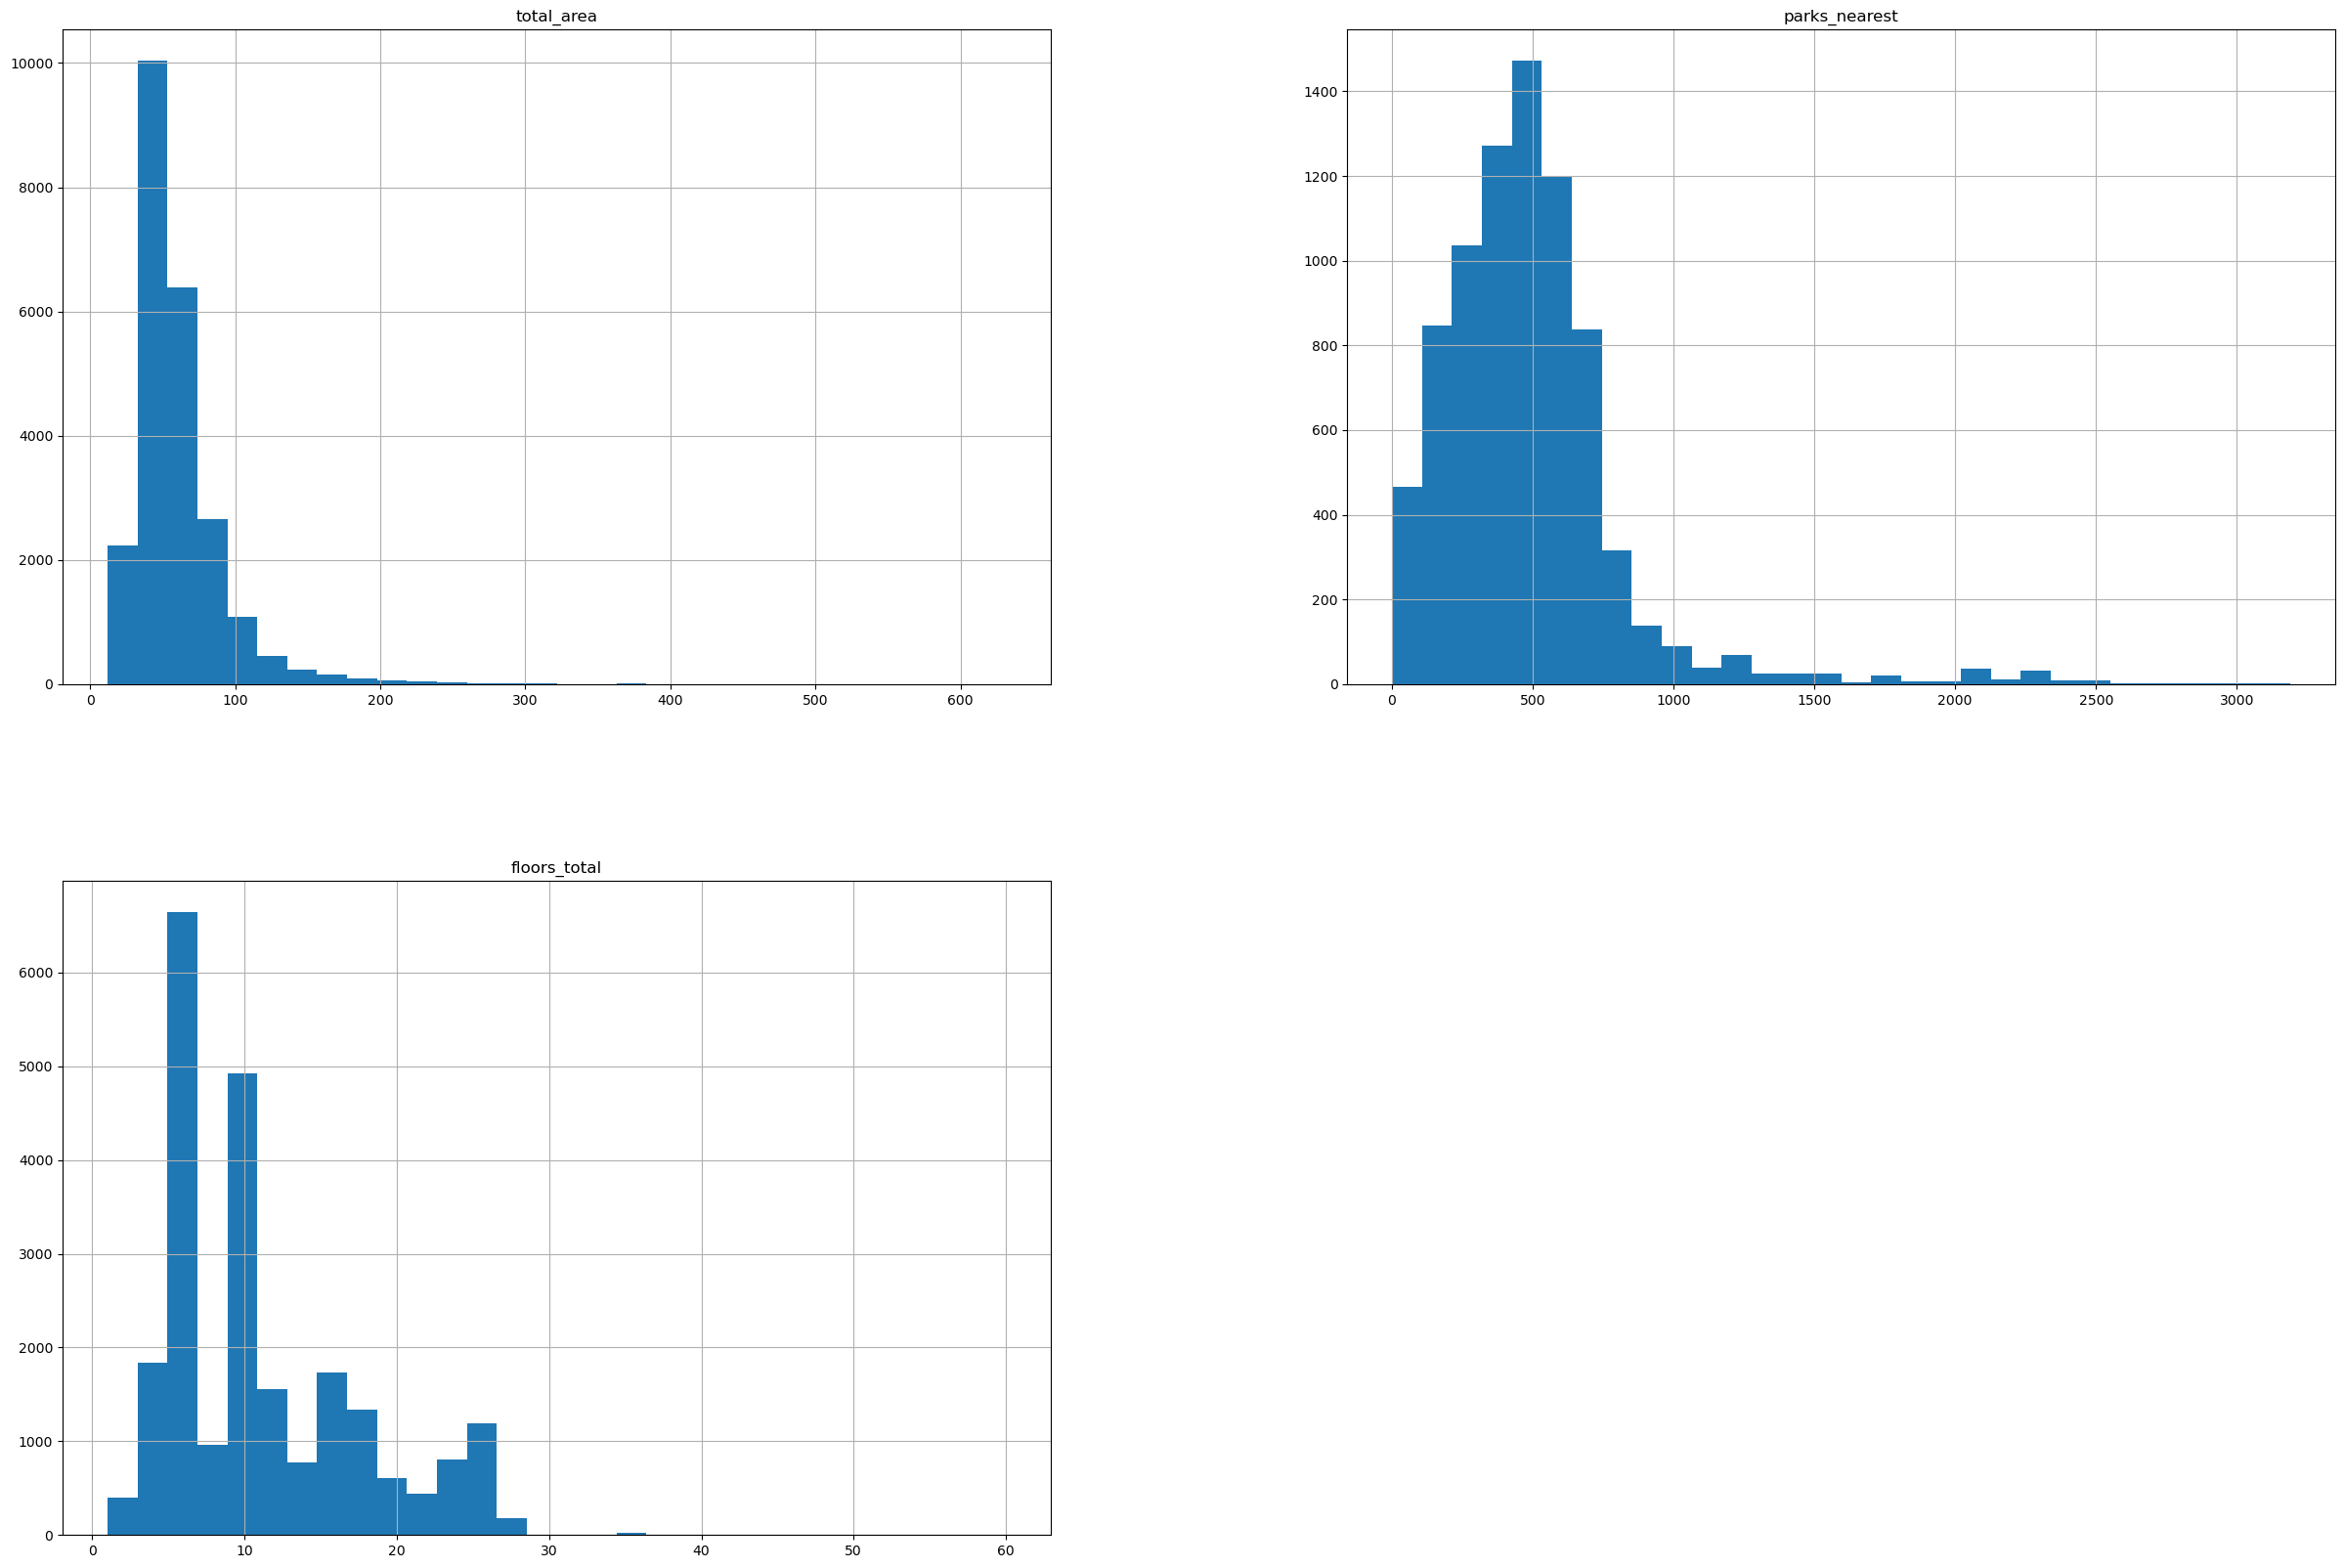

In [17]:
# взглянем на другие столбцы, где могут быть редкие и выбивающиеся значения,
# а именно на "total_area", "parks_nearest", "floors_total" (в остальных не представляется статистически
# необходимым менять данные)

print(data[["total_area", "parks_nearest", "floors_total"]].describe())
data[["total_area", "parks_nearest", "floors_total"]].hist(figsize=(30,20), bins=30)
None

Заметим наличие выбросов в данным столбцах. Для более верного исследования устраним редкие значения в данных столбцах. Так, в столбце total_area удалим значения, которые больше 150 кв. м, в столбце park_nearest удалим те, что больше 1500, в столбце floors_total удалим те, что больше 28. Предварительно проверим, что мы теряем не более 10% данных.

In [18]:
# проверим, что теряем не более 10% данных
print(len(data.query('total_area > 150')) / len(data))
print(len(data.query('parks_nearest > 1500')) / len(data))
print(len(data.query('floors_total > 28')) / len(data))
# как видим, в сумме где-то 3%, поэтому можем удалять

0.021969149704670038
0.007351378914715506
0.0013597926316236775


In [19]:
# утраним вышеуказанные выбивающиеся значения в датасете

data = data[((data['total_area'] <= 150) | (data['total_area'].isna() == True))]
data = data[((data['parks_nearest'] <= 1500) | (data['parks_nearest'].isna() == True))]
data = data[((data['floors_total'] <= 28) | (data['floors_total'].isna() == True))]

### Название столбцов

In [20]:
# приведем везде названия столбцов к змеиному регистру

data.columns = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'locality_name_new']

<div class="alert"; style="border-left: 7px solid pink">

**Промежуточный вывод**:

В ходе подготовки данных для дальнейшего анализа были обработаны (в т.ч. заменены) пропуски, изучены неявные дубликаты в столбце с названимем населенных пунктов, скорректированы типы данных в столбцах с датой и булевым значением, удалены аномалии и сведены к змеиному регистру названия столбцов.
</div>

## Дизайн данныз <a id=4> </a>

Добавим столбец с ценой одного квадратного метра на квартиру:

In [21]:
data['one_meter_price'] = (data['last_price'] / data['total_area']).astype(int)

Добавим столбец с днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее). Для этого напишем специальную функцию:

In [22]:
def to_week(weekday):
    if weekday == 0:
        weekday = '0 (понедельник)'
    elif weekday == 1:
        weekday = '1 (вторник)'
    elif weekday == 2:
        weekday = '2 (среда)'
    elif weekday == 3:
        weekday = '3 (четверг)'
    elif weekday == 4:
        weekday = '4 (пятница)'
    elif weekday == 5:
        weekday = '5 (суббота)'
    else:
        weekday = '6 (воскреcенье)'
    return weekday

data['week_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['week_exposition'] = data['week_exposition'].apply(to_week)

In [23]:
# Добавим столбец с месяцем публикации объявления (1 - Январь, 12 - Декабрь и так далее). Для этого напишем функцию
def to_month(month):
    if month == 1:
        month = '01 (январь)'
    elif month == 2:
        month = '02 (февраль)'
    elif month == 3:
        month = '03 (март)'
    elif month == 4:
        month = '04 (апрель)'
    elif month == 5:
        month = '05 (май)'
    elif month == 6:
        month = '06 (июнь)'
    elif month == 7:
        month = '07 (июль)'
    elif month == 8:
        month = '08 (август)'
    elif month == 9:
        month = '09 (сентябрь)'
    elif month == 10:
        month = '10 (октябрь)'
    elif month == 11:
        month = '11 (ноябрь)'
    else:
        month = '12 (декабрь)'
    return month
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['month_exposition'] = data['month_exposition'].apply(to_month)

Добавим столбец с годом публикации объявления:

In [24]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

Добавим столбец с типом этажа квартиры (Значения - первый, последний, другой). Для этого напишем специальную функцию:

In [25]:
def type_floor(line):
    if line['floor'] == 1:
        return 'первый'
    elif line['floor'] == line['floors_total']:
        return 'последний'
    return 'другой'

data['type_floor'] = data.apply(type_floor, axis=1)

Добави столбец с расстоянием до центра в киломентрах. Для удобства напишем вспомогательную функцию:

In [26]:
def city_centers_nearest_km(city_centers_nearest):
    if math.isnan(city_centers_nearest) != True:
        return city_centers_nearest // 1000

data['city_centers_nearest_km'] = data['city_centers_nearest'].apply(city_centers_nearest_km)

## Исследование данных <a id=5> </a>

*Рассмотрим далее параметры, которые присутствуют в датасете, более подробно. А именно, изучим следующие показатели:*
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

### Общая площаль

In [27]:
data.total_area.describe()

count    22816.000000
mean        56.405592
std         22.772458
min         12.000000
25%         40.000000
50%         51.000000
75%         67.400000
max        150.000000
Name: total_area, dtype: float64

<Axes: >

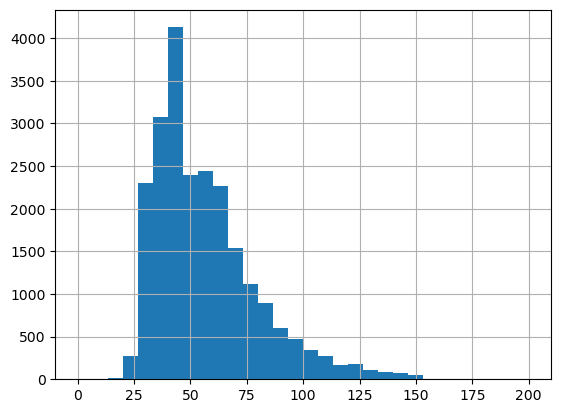

In [28]:
data.total_area.hist(bins=30, range=(0, 200))

In [29]:
data.pivot_table(
    index='locality_name_new',
    values='total_area',
    aggfunc='median')['total_area'].sort_values(ascending=False).head(10)

locality_name_new
Каськово          100.0
Нижняя             98.0
Глинка             91.5
Пижма              79.5
Углово             74.3
Нижние Осельки     74.0
Возрождение        74.0
Снегиревка         73.7
Высокоключевой     73.0
Пикколово          72.3
Name: total_area, dtype: float64

**Комментарий к показателю**

Средняя площадь квартиры в датасете - 59 кв. м. При этом медианное значение находится на уровне 52 кв. м. Причиной этому служат выбивающиеся значения. Несмотря на то, что 75% квартир имеют площадь до 70 кв. м., в выборке есть квартиры с 200, 300 и более кв. м. площади, но таких - меньшинство. Наиболее популярная площадь ~45 кв. м. Наибольшая площадь жилья в населенном пункте "Хязельки" (медианное значение равно 230 кв. м.)

### Жилая площаль

In [30]:
data.living_area.describe()

count    21005.000000
mean        32.314563
std         15.407388
min          2.000000
25%         18.500000
50%         30.000000
75%         41.500000
max        128.000000
Name: living_area, dtype: float64

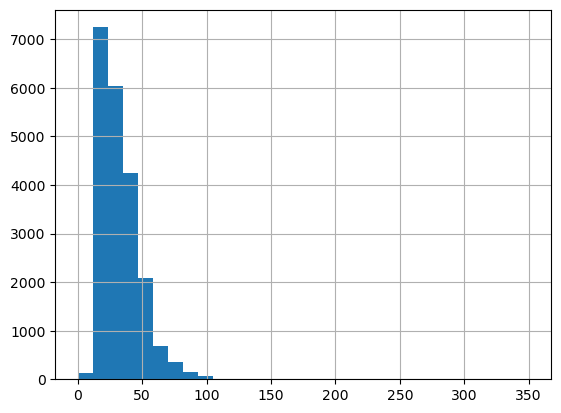

In [31]:
data.living_area.hist(bins=30,range=(0, 350))
None

In [32]:
data.pivot_table(
    index='locality_name_new',
    values='living_area',
    aggfunc='median')['living_area'].sort_values(ascending=False).head(10)

locality_name_new
Нижняя             73.0
Малая Романовка    57.4
Пижма              55.0
Ропша              53.0
Возрождение        52.0
Счастье            52.0
Высокоключевой     50.0
Углово             48.5
Рабитицы           46.0
Дзержинского       45.5
Name: living_area, dtype: float64

In [33]:
#Доля жилой площади в квартирах Санкт-Петербурга
data.pivot_table(index='locality_name_new', values='living_area', aggfunc='median')['living_area'].sort_values(ascending=False)['Санкт-Петербург'] \
/ data.pivot_table(index='locality_name_new', values='total_area',aggfunc='median')['total_area'].sort_values(ascending=False)['Санкт-Петербург'] 

0.5740740740740741

**Комментарий к показателю**

Средний размер жилой площади - 34 кв. м., медианное значение - 30. 75% квартир из выборки имеют жилую площади до 42 кв. м. Лидер по размеру жилой площади вовсе не тот, кто был лидером по общей. Наибольшая медианная жилая площадь у квартир, продававшихся в населенном пункте под названием "Бор".

Доля жилой площади в квартирах Санкт-Петербурга составляет 57% 

### Площаль кухни

In [34]:
data.kitchen_area.describe()

count    20642.000000
mean        10.122217
std          4.623716
min          4.000000
25%          7.000000
50%          9.000000
75%         11.567500
max         45.000000
Name: kitchen_area, dtype: float64

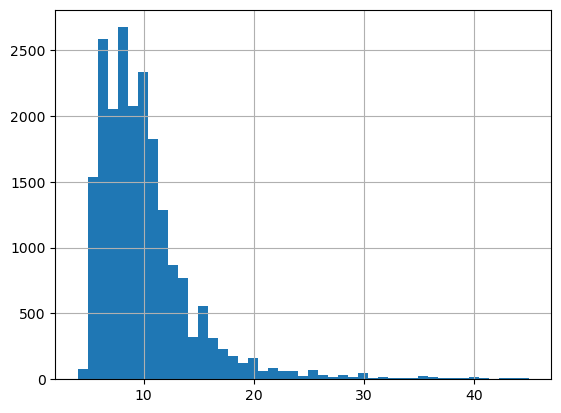

In [35]:
data.kitchen_area.hist(bins=45)
None

In [36]:
data.pivot_table(
    index='locality_name_new',
    values='kitchen_area',
    aggfunc='median')['kitchen_area'].sort_values(ascending=False).head(10)

locality_name_new
Пикколово          23.60
Каськово           22.00
Кивеннапа Север    18.00
Глинка             17.25
Юкки               15.00
Куттузи            13.85
Новая Ропша        13.00
Паша               13.00
Кальтино           12.76
Аро                12.50
Name: kitchen_area, dtype: float64

In [37]:
#Доля кухонной площади в квартирах Санкт-Петербурга
data.pivot_table(index='locality_name_new', values='kitchen_area', aggfunc='median')['kitchen_area'].sort_values(ascending=False)['Санкт-Петербург'] \
/ data.pivot_table(index='locality_name_new', values='total_area',aggfunc='median')['total_area'].sort_values(ascending=False)['Санкт-Петербург'] 

0.17592592592592593

**Комментарий к показателю**

Средний размер кухонной площади - 10 кв. м., медианное значение - 9 кв. м. 75% квартир из выборки имеют площадь кухни до 12 кв. м.  
Лидер по размеру кухонной площади - населенный пункт "Бор". В целом, видим что Бор входит в топ-10 и по общей площади, и по жилой, и по кухонной.

Доля кухонной площади в квартирах Санкт-Петербурга составляет 18% 

### Цена объекта

In [38]:
data.last_price.describe()

count    2.281600e+04
mean     5.640283e+06
std      4.360500e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      1.240000e+08
Name: last_price, dtype: float64

In [39]:
data.sort_values(by='last_price', ascending=True).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_name_new,one_meter_price,week_exposition,month_exposition,year_exposition,type_floor,city_centers_nearest_km
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0.0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,Санкт-Петербург,111,2 (среда),03 (март),2019,последний,9.0
17456,7,430000.0,30.4,2019-04-22,1,NaN,2.0,16.0,1,False,False,False,6.0,0.0,Сланцы,NaN,NaN,0.0,NaN,0.0,NaN,NaN,Сланцы,14144,0 (понедельник),04 (апрель),2019,первый,NaN
14911,5,430000.0,54.0,2018-06-26,2,NaN,3.0,NaN,3,False,False,False,NaN,0.0,посёлок станции Свирь,NaN,NaN,0.0,NaN,0.0,NaN,44.0,Свирь,7962,1 (вторник),06 (июнь),2018,последний,NaN
16274,18,440000.0,40.0,2018-07-10,1,NaN,5.0,NaN,1,False,False,False,NaN,0.0,деревня Старополье,NaN,NaN,0.0,NaN,0.0,NaN,45.0,Старополье,11000,1 (вторник),07 (июль),2018,первый,NaN
5698,7,450000.0,42.0,2017-07-31,2,NaN,1.0,23.0,1,False,False,False,5.8,0.0,городской посёлок Будогощь,NaN,NaN,0.0,NaN,0.0,NaN,233.0,Будогощь,10714,0 (понедельник),07 (июль),2017,первый,NaN


In [40]:
data.sort_values(by='last_price', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_name_new,one_meter_price,week_exposition,month_exposition,year_exposition,type_floor,city_centers_nearest_km
4996,20,124000000.0,124.5,2017-10-12,4,3.00,4.0,67.20,2,False,False,False,20.00,0.0,Санкт-Петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0,Санкт-Петербург,995983,3 (четверг),10 (октябрь),2017,другой,1.0
11430,20,85000000.0,145.7,2018-08-16,3,3.36,5.0,87.23,5,False,False,False,20.31,1.0,Санкт-Петербург,28371.0,6917.0,2.0,165.0,2.0,500.0,NaN,Санкт-Петербург,583390,3 (четверг),08 (август),2018,последний,6.0
6462,2,82000000.0,114.0,2015-12-17,3,NaN,5.0,78.50,4,False,False,False,20.00,0.0,Санкт-Петербург,22460.0,3400.0,2.0,218.0,3.0,69.0,651.0,Санкт-Петербург,719298,3 (четверг),12 (декабрь),2015,другой,3.0
15726,7,77349000.0,135.7,2017-12-16,3,NaN,7.0,NaN,5,False,False,False,NaN,0.0,Санкт-Петербург,32950.0,6042.0,3.0,362.0,3.0,246.0,90.0,Санкт-Петербург,570000,5 (суббота),12 (декабрь),2017,другой,6.0
11912,20,66500000.0,147.2,2016-05-13,3,3.00,6.0,91.00,3,False,False,False,16.00,0.0,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,480.0,Санкт-Петербург,451766,4 (пятница),05 (май),2016,другой,7.0


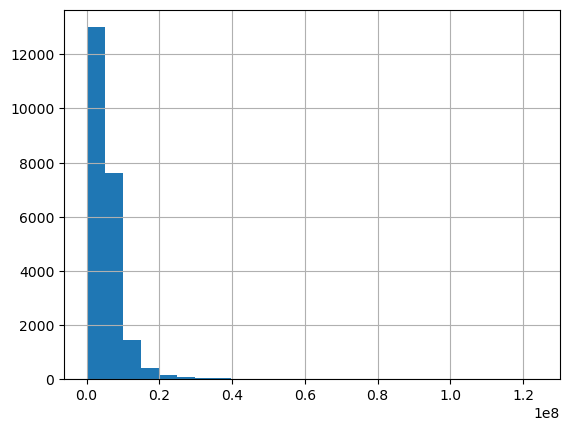

In [41]:
data.last_price.hist(bins=25)
None

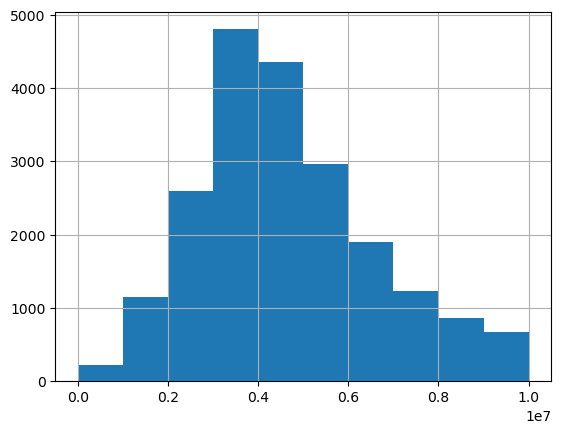

In [42]:
data.last_price.hist(range=(0, 10000000))
None

**Комментарий к показателю**

Средняя цена - 6.38 млн. руб, медианная цена - 4.6 млн. На это в т. ч. влияют дорогостоящие квартиры. Так, максимальная цена на квартиры была 763 млн. руб. Самая дешевая квартира стоила 430 тыс. руб. (однако по таблице есть квартира по цене 12190р в центре Санкт-Петербурга, что, скорее всего, ошибка объявления либо фальшивое объявление).  
Самые дорогие квартиры продавались в Санкт-Петербурге, что неудивительно.

### Количество комнат

In [43]:
data.rooms.describe()

count    22816.000000
mean         2.000745
std          0.950472
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

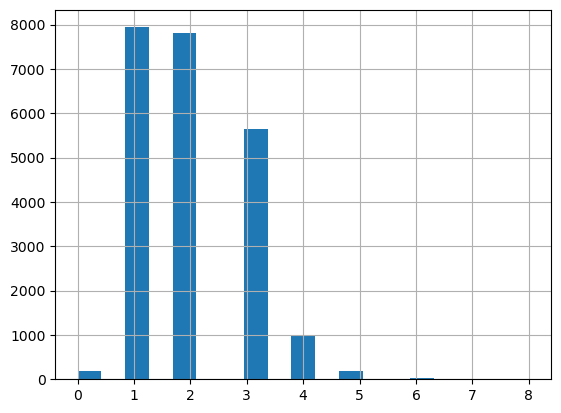

In [44]:
data.rooms.hist(bins=19)
None

In [45]:
data.pivot_table(
    index='locality_name_new',
    values='rooms',
    aggfunc='median')['rooms'].sort_values(ascending=False).head(10)

locality_name_new
Нижняя            4.0
Возрождение       4.0
Дзержинского      4.0
Свирьстрой        3.0
Войсковицы        3.0
Лужайка           3.0
Каськово          3.0
Терпилицы         3.0
Лесогорский       3.0
Высокоключевой    3.0
Name: rooms, dtype: float64

In [46]:
#Медианное количество квартир в Санкт-Петербурге
data.pivot_table(
    index='locality_name_new',
    values='rooms',
    aggfunc='median')['rooms'].sort_values(ascending=False)['Санкт-Петербург']

2.0

In [47]:
#Проверяем, есть ли квартиры, где по ошибке указано 0 комнат
len(data[data['rooms'] == 0]) # Подобных квартир целых 196 штуки

193

**Комментарий к показателю**

Как правило продавались двух- или трехкомнатные квартиры. Присутствует ряд квартир с большим количеством квартир - 4 и выше.
В Санкт-Петербурге как правило продавались двухкомнатные квартиры.

### Высота потолков

In [48]:
data.ceiling_height.describe()

count    13951.000000
mean         2.710429
std          0.253379
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

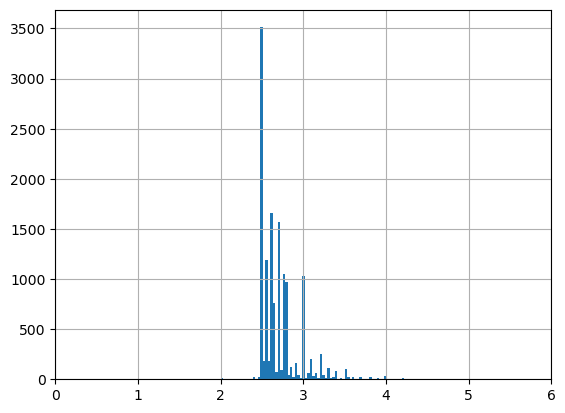

In [49]:
data.ceiling_height.hist(bins=100)
plt.xlim(0, 6)
None

In [50]:
#Медианная высота потолков в квартирах, продававшихся в Санкт-Петербурге
data.pivot_table(
    index='locality_name_new',
    values='ceiling_height',
    aggfunc='median')['ceiling_height'].sort_values(ascending=False)['Санкт-Петербург']

2.7

**Комментарий к показателю**

Средняя высота потолков - 2.7 м., такая же прослеживается в объявлениях о продаже квартир в Санкт-Петербурге. Примерно 20% имеют потолки 3 м. и выше. Нереалистичные значения ранее были удалены, поэтому распределение выглядит нормальным.

### Этаж квартир и его тип

In [51]:
data.floor.describe()

count    22816.000000
mean         5.888061
std          4.876382
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

In [52]:
data.sort_values(by='floor', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_name_new,one_meter_price,week_exposition,month_exposition,year_exposition,type_floor,city_centers_nearest_km
113,8,5750000.0,78.00,2016-05-19,3,NaN,27.0,45.4,27,False,False,False,10.80,2.0,посёлок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,426.0,Парголово,73717,3 (четверг),05 (май),2016,последний,19.0
13276,0,4450000.0,38.00,2017-12-10,1,NaN,27.0,NaN,27,False,False,False,NaN,0.0,посёлок Парголово,52480.0,18657.0,0.0,NaN,0.0,NaN,76.0,Парголово,117105,6 (воскреcенье),12 (декабрь),2017,последний,18.0
7711,12,4799000.0,60.00,2017-04-18,2,2.50,28.0,31.0,27,False,False,False,10.00,2.0,посёлок Парголово,53734.0,19942.0,0.0,NaN,0.0,NaN,87.0,Парголово,79983,1 (вторник),04 (апрель),2017,другой,19.0
23292,6,2980000.0,36.02,2018-07-26,1,2.65,27.0,NaN,27,False,False,False,9.26,1.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,72.0,Мурино,82731,3 (четверг),07 (июль),2018,последний,NaN
6157,9,2990000.0,33.30,2017-07-19,1,NaN,27.0,15.3,27,False,False,False,9.70,1.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,383.0,Мурино,89789,2 (среда),07 (июль),2017,последний,NaN


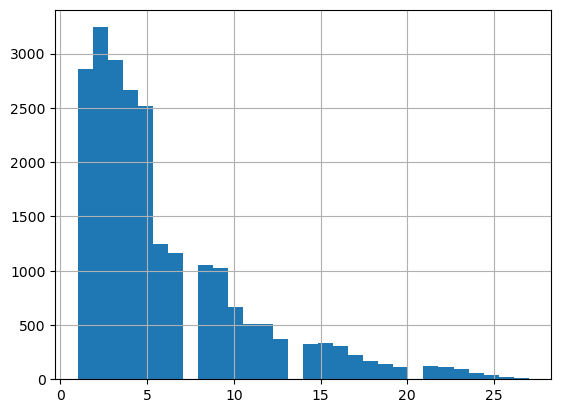

In [53]:
data.floor.hist(bins=30)
None

In [54]:
data.groupby('type_floor')['type_floor'].value_counts()

type_floor
другой       16810
первый        2858
последний     3148
Name: count, dtype: int64

**Комментарий к показателю**

В выборке 2900 квартир находятся на первом этаже, 3305 - на последнем. Большинство продаваемых квартир были ниже 10 этажа (75% до 8 этажа). Соответственно, самые частые этажи - от 1-го до 10-го.

### Общее количество этажей в доме

In [55]:
data.floors_total.value_counts()

floors_total
5.0     5600
9.0     3711
16.0    1339
12.0    1312
10.0    1135
4.0     1122
25.0    1067
17.0     817
6.0      813
3.0      628
14.0     542
7.0      529
18.0     497
24.0     460
2.0      366
15.0     356
23.0     344
8.0      333
19.0     327
22.0     285
20.0     257
13.0     215
11.0     193
27.0     163
21.0     157
26.0     123
1.0       23
28.0      21
Name: count, dtype: int64

In [56]:
data.query('locality_name_new == "Санкт-Петербург"').floors_total.value_counts().head()

floors_total
5.0     2874
9.0     2726
16.0    1170
12.0    1073
10.0     785
Name: count, dtype: int64

In [57]:
data.floors_total.describe()

count    22735.000000
mean        10.719331
std          6.560537
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         28.000000
Name: floors_total, dtype: float64

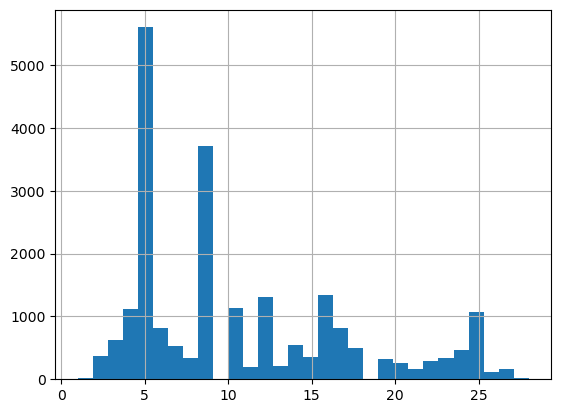

In [58]:
data.floors_total.hist(bins=30)
None

In [59]:
data.query('floors_total > 36')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_name_new,one_meter_price,week_exposition,month_exposition,year_exposition,type_floor,city_centers_nearest_km


**Комментарий к показателю**

Самые частые типы домов - пяти- и девятииэтажки. Квартир, находящихся в домах, где всего более 25 этажей, как правило нет. Среди высотных домов присутствуют 35-этажки и 28-этажки. Присутствуют 23 одноэтажки и одна квартира в доме из 60-ти этажей (максимальное значение в выборке).

Квартиры, продаваемые в Санкт-Петербурге, наиболее часто относились к пяти- и девятиэтажкам.

### Расстояние до центра города в метрах

In [60]:
data.city_centers_nearest.describe()

count    17332.000000
mean     14427.206208
std       8565.530303
min        208.000000
25%       9723.750000
50%      13251.500000
75%      16398.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<Axes: >

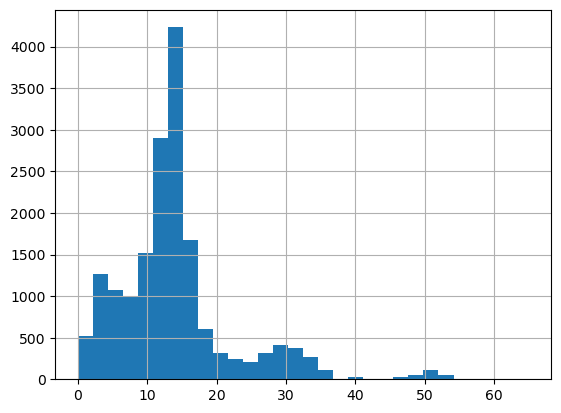

In [61]:
data.city_centers_nearest_km.hist(bins=30)

In [62]:
data.query('locality_name_new == "Санкт-Петербург"').city_centers_nearest_km.mean()

11.300879017647453

**Комментарий к показателю**

Как правило, продаваемые квартиры были в пределах 5-20 км от центр населенного пункта. В среднем, значение равно 14 км, а медиана 13. Распределение данного параментра частично напоминает нормальное. Есть мини-пики на уровне 4-5 км и на уровне 30 км.  
Квартиры в Санкт-Петербурге, которые продавались в объявлениях, находились в среднем на расстоянии 11-12 км от центра города.

### Расстояние до ближайшего аэропорта

In [63]:
data.airports_nearest.describe()

count    17312.000000
mean     28873.264325
std      12775.911494
min          0.000000
25%      18428.000000
50%      26922.500000
75%      37412.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<Axes: >

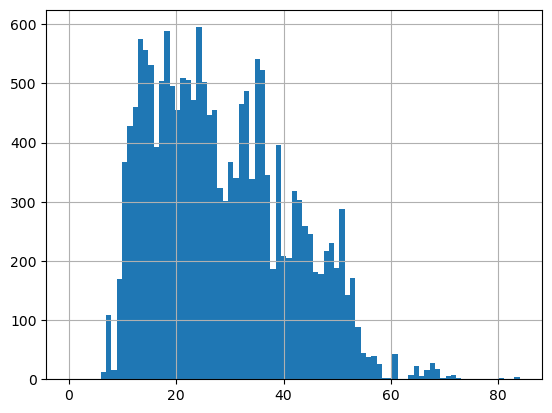

In [64]:
(data.airports_nearest // 1000).hist(bins=85)

**Комментарий к показателю**

Квартиры с точки зрения отдаленности от ближайщего аэропорта отличаются. Для некоторых квартир - это 5-10 км, для некоторых - 40-60. Как правило, квартиры находились на расстоянии 10-40 км. 75% квартир находились в пределах 37 км. В среднем - 29км, медиана - 27км. Ряд квартир отдалены на более чем 60 км, вплоть до 85км (максимальное значение).

### Расстояние до ближайшего парка

In [65]:
data.parks_nearest.describe()

count    7493.000000
mean      458.130522
std       242.546945
min         1.000000
25%       287.000000
50%       450.000000
75%       603.000000
max      1499.000000
Name: parks_nearest, dtype: float64

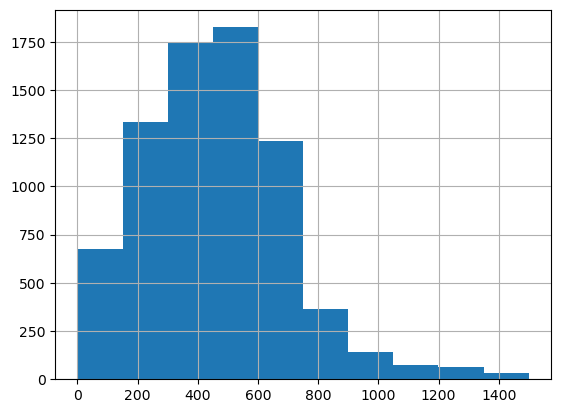

In [66]:
data.parks_nearest.hist()
None

In [67]:
data.query('locality_name_new == "Санкт-Петербург"').parks_nearest.mean()

465.53238476359866

**Комментарий к показателю**

В среднем, продаваемые квартиры находились на расстоянии 500м до ближайшего пара. Абсолютное большинство - до 1км. Самая отдаленная от парка квартира была на расстоянии 3190м. В Санкт-Петербурге, парк был как правило в предах 500м от квартиры. 

### День и месяц публикации объявления

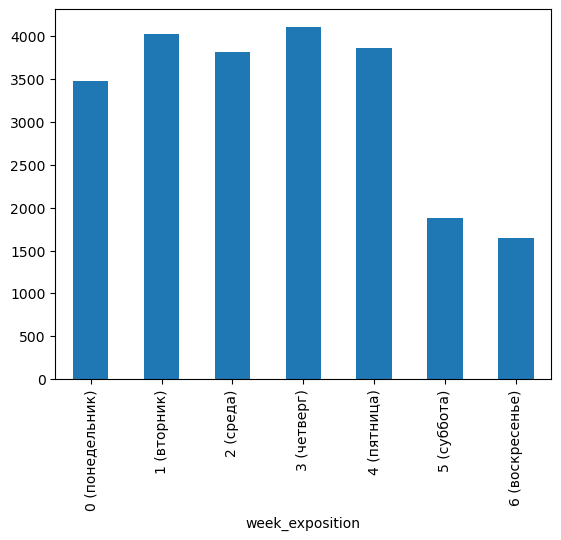

In [68]:
data.groupby('week_exposition')['week_exposition'].count().plot(kind='bar')
None

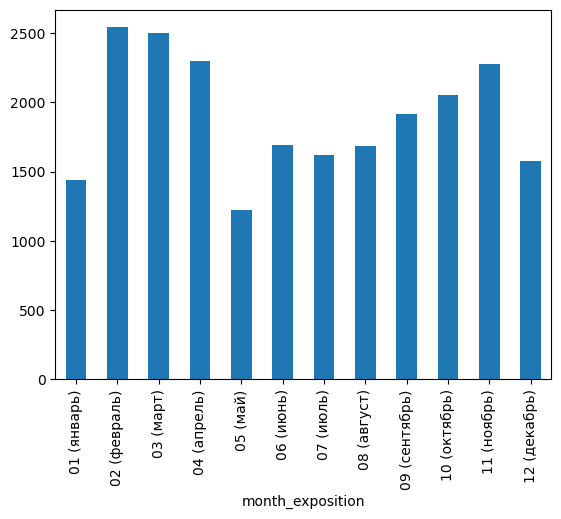

In [69]:
data.groupby('month_exposition')['month_exposition'].count().plot(kind='bar')
None

In [70]:
pd.DataFrame(data.groupby('month_exposition')['week_exposition'].value_counts())

count
month_exposition week_exposition       
01 (январь)      0 (понедельник)    276
                 4 (пятница)        247
                 2 (среда)          242
                 1 (вторник)        229
                 3 (четверг)        199
...                                 ...
12 (декабрь)     3 (четверг)        255
                 2 (среда)          242
                 0 (понедельник)    239
                 5 (суббота)        163
                 6 (воскреcенье)    135

[84 rows x 1 columns]

**Комментарий к показателю**

Наиболее популярные дни недели для публикации объявления - вторник и четверг, наименее популярные - суббота и воскресенье.  
Наиболее популярные месяцы  для публикации объявления - февраль и март, наименее популярные - январь и май.

### Насколько быстро продавались квартиры?

Как видим, среднее (180) сильно больше медианы (95). скорее всего, есть большие выбросы:

In [71]:
data.days_exposition.describe()

count    19817.000000
mean       177.508553
std        216.303174
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

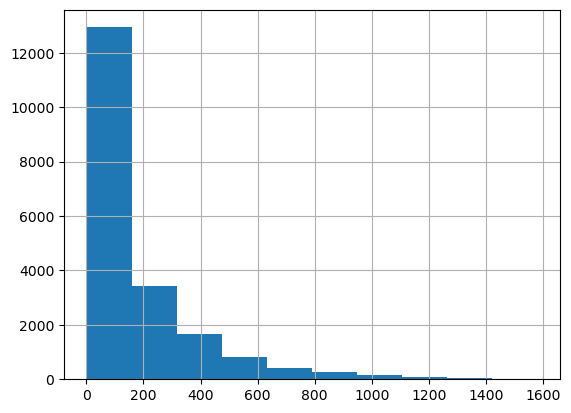

In [72]:
data.days_exposition.hist()
None

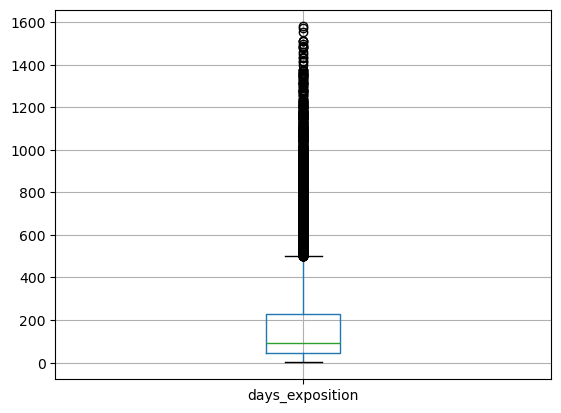

In [73]:
data.boxplot(column=['days_exposition']) # видим большое кол-во выбросов, квартир, которые продаваплись долго
plt.show()

In [74]:
data.sort_values(by='days_exposition', ascending=False)[['locality_name_new', 'days_exposition']].head()

,locality_name_new,days_exposition
18843,Новое Девяткино,1580.0
1109,Санкт-Петербург,1572.0
9553,Санкт-Петербург,1553.0
1885,Санкт-Петербург,1513.0
20969,Санкт-Петербург,1512.0


In [75]:
data.sort_values(by='days_exposition', ascending=True)[['locality_name_new', 'days_exposition']].head()

,locality_name_new,days_exposition
1632,Санкт-Петербург,1.0
13061,Санкт-Петербург,2.0
16053,Санкт-Петербург,2.0
16212,Санкт-Петербург,2.0
13389,Красное Село,3.0


**Комментарий**

Как правило, квартиры продавались за 100 дней (их можно считать быстрыми продажами). 75% продалиси быстрее чем 231 дней. При это есть множество квартир, которые продавались долго, многие из них - в городе Санкт-Петербург. Наиболее долгое объявление - 1580 дней (в целом, судя по графику, долгими продажами можно считать те, что продавались дольше 600 дней). Наиболее быстро квартиры продавались так же в Санкт-Петербург. Вероятно, потому что это большой город и спрос велик. Среднее почти вдвое больше медианы, поскольку в данных присутствуют очень затяжные объявления.

### Какие факторы больше всего влияют на общую стоимость квартиры?

Рассмотрим, какие факторы из ниже представленных больше всего влияют на полную стоимость объекта:
- `общей площади`;
- `жилой площади`;
- `площади кухни`;
- `количество комнат`;
- `типа этажа, на котором расположена квартира`;
- `даты размещения (день недели, месяц, год)`.

0.7029827732907531

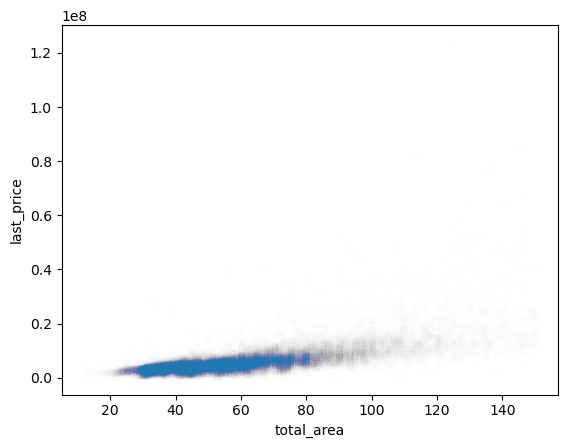

In [76]:
#Влияние общей площади на стоимость квартиры
data[['last_price', 'total_area']].plot(x='total_area', y='last_price', kind='scatter', alpha=0.005)
data['total_area'].corr(data['last_price'])

Присутствует высокая положительная корреляция (0.7). Следовательно, можем говорить, что связь между этими показателями есть.

0.5866715339123149

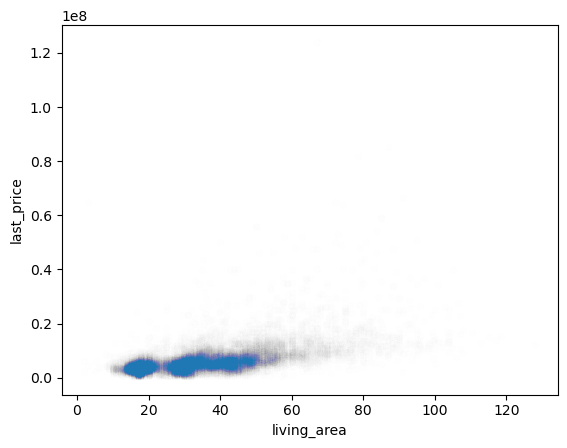

In [77]:
#Влияние жилой площади на стоимость квартиры
data[['living_area', 'last_price']].plot(x='living_area', y='last_price', kind='scatter', alpha=0.005)
data['living_area'].corr(data['last_price'])

Присутствует средняя положительная корреляция (0.59). Следовательно, можем говорить, что определенная связь между этими показателями есть, что логично, тк как жилая площадь связана с общей площадью

0.5300211398487031

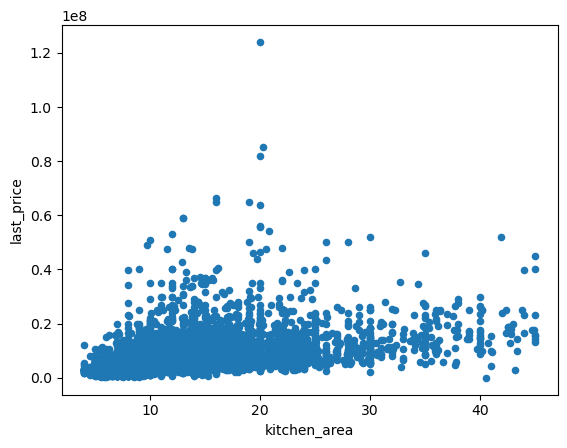

In [78]:
#Влияние кухонной площади на стоимость квартиры
data[['kitchen_area', 'last_price']].plot(x='kitchen_area', y='last_price', kind='scatter')
data['kitchen_area'].corr(data['last_price'])

Присутствует средняя положительная корреляция (0.53). Следовательно, можем говорить, что определенная связь между этими показателями есть, что логично, тк как кухонная площадь тоже коррелирует с общей площадью

0.41081713807284753

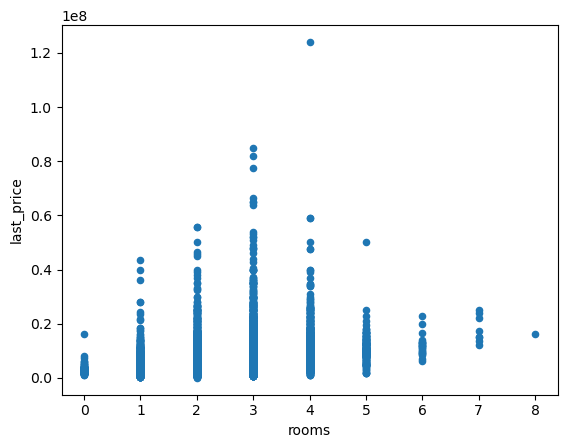

In [79]:
#Влияние количества комнат на стоимость квартиры
data[['rooms', 'last_price']].plot(x='rooms', y='last_price', kind='scatter')
data['rooms'].corr(data['last_price'])

Присутствует слабая положительная корреляция (0.41). Следовательно, можем говорить, что связь между этими показателями небольшая

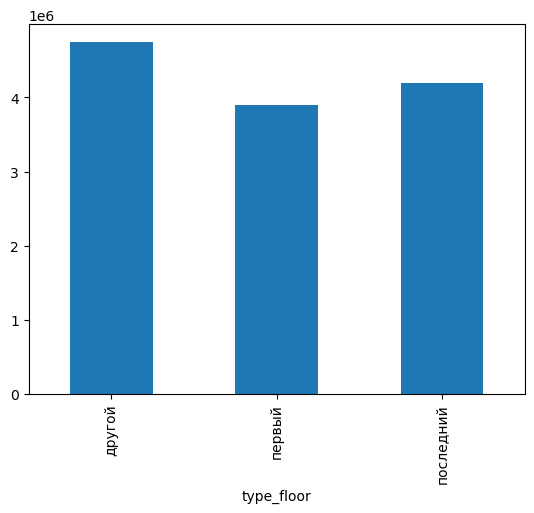

In [80]:
#Влияние типа этажа комнат на медианную стоимость квартиры
data.groupby('type_floor')['last_price'].median().plot(kind='bar')
plt.show() 

Видим, что первые этажи стоят дешевле

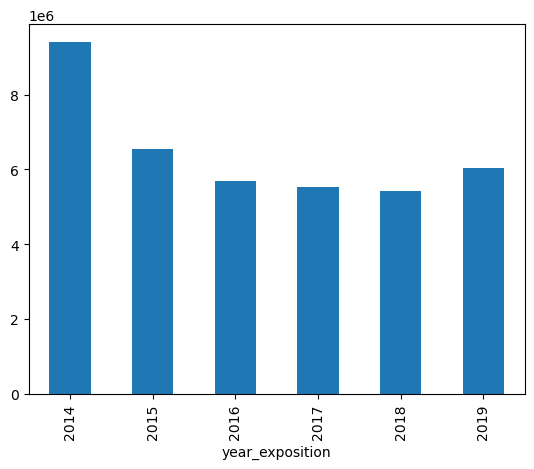

In [81]:
#Влияние года размещения объявления на стоимость квартиры
data.groupby('year_exposition')['last_price'].mean().plot(kind='bar')
None

Видим, что дороже всего квартиры продавались в 2014 году, потом их цена резко упала

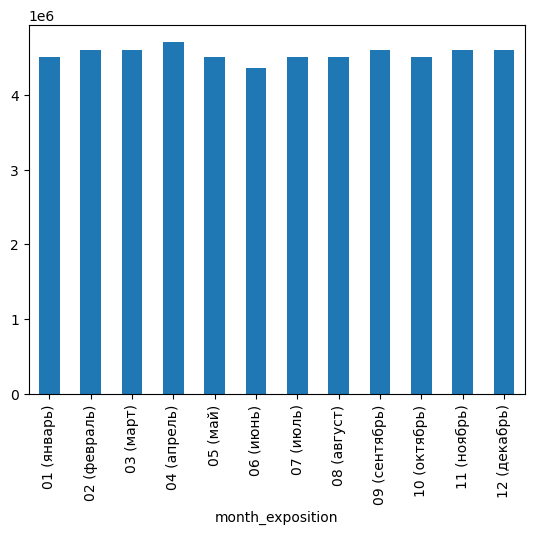

In [82]:
#Влияние месяца размещения объявления на стоимость квартиры
data.groupby('month_exposition')['last_price'].median().plot(kind='bar')
None

Cильного влияния месяца на стоимость квартиры нет

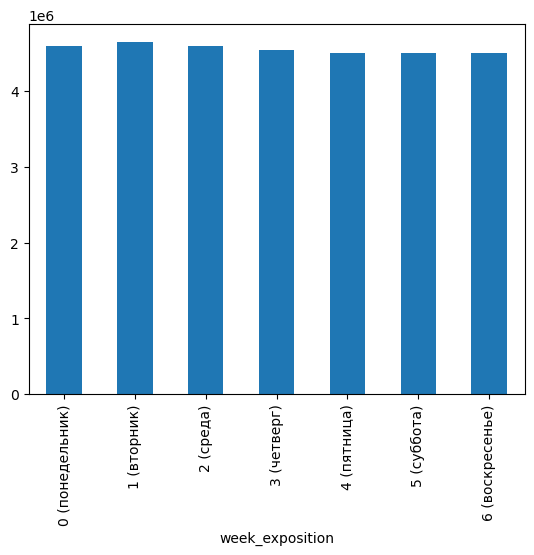

In [83]:
#Влияние дня недели размещения объявления на стоимость квартиры
data.groupby('week_exposition')['last_price'].median().plot(kind='bar')
None

Cильного влияния дня недели на стоимость квартиры нет.

**Комментарий**

Больше всего на стоимость влиет общая площадь (корреляция 0.62) и год объявления (больше всего цены были в 2014). Прочие факторы имели невысокую коррлеяцию (~0.5).

### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [84]:
announcements_number = {'location':[], 'number_of_announcements': []}
for location, location_data in data.groupby('locality_name_new'):
    announcements_number['location'].append(location)
    announcements_number['number_of_announcements'].append(len(location_data))
dt_announcements_number = pd.DataFrame(announcements_number)

Выведем топ-10 населенных пунктов по числу объявлений:

In [85]:
dt_announcements_number.sort_values(by='number_of_announcements', ascending=False).head(10)

,location,number_of_announcements
222,Санкт-Петербург,14953
145,Мурино,587
105,Кудрово,472
295,Шушары,439
34,Всеволожск,397
201,Пушкин,355
88,Колпино,332
169,Парголово,325
42,Гатчина,307
35,Выборг,235


Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

In [86]:
def what_average(row):
    return int(data[data['locality_name_new'] == row['location']]['one_meter_price'].mean())
dt_announcements_number['average_price'] = dt_announcements_number.apply(what_average, axis=1)
dt_announcements_number.head(10)

,location,number_of_announcements,average_price
0,Агалатово,4,71213
1,Александровская,1,63559
2,Алексеевка,1,22222
3,Аннино,16,63322
4,Аро,3,51412
5,Барышево,2,31841
6,Батово,9,30383
7,Бегуницы,17,37905
8,Белогорка,11,34358
9,Белоостров,1,66666


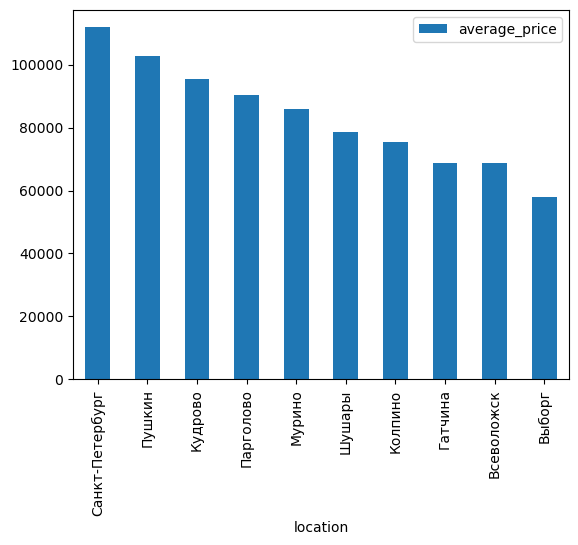

In [87]:
average_price_top10 = dt_announcements_number.sort_values(by='number_of_announcements', ascending=False).head(10)[['location', 'average_price']]
pd.DataFrame(average_price_top10.groupby('location')['average_price'].mean()).sort_values(by='average_price', ascending=False).plot(kind='bar')
None

In [88]:
average_price_top10

,location,average_price
222,Санкт-Петербург,111768
145,Мурино,86019
105,Кудрово,95324
295,Шушары,78550
34,Всеволожск,68702
201,Пушкин,102610
88,Колпино,75299
169,Парголово,90317
42,Гатчина,68745
35,Выборг,58075


In [89]:
pd.DataFrame(data[data['locality_name_new'] == 'Мурино']['one_meter_price']).head()

,one_meter_price
8,87454
38,78750
60,78285
66,101470
133,101612


(0.0, 200000.0)

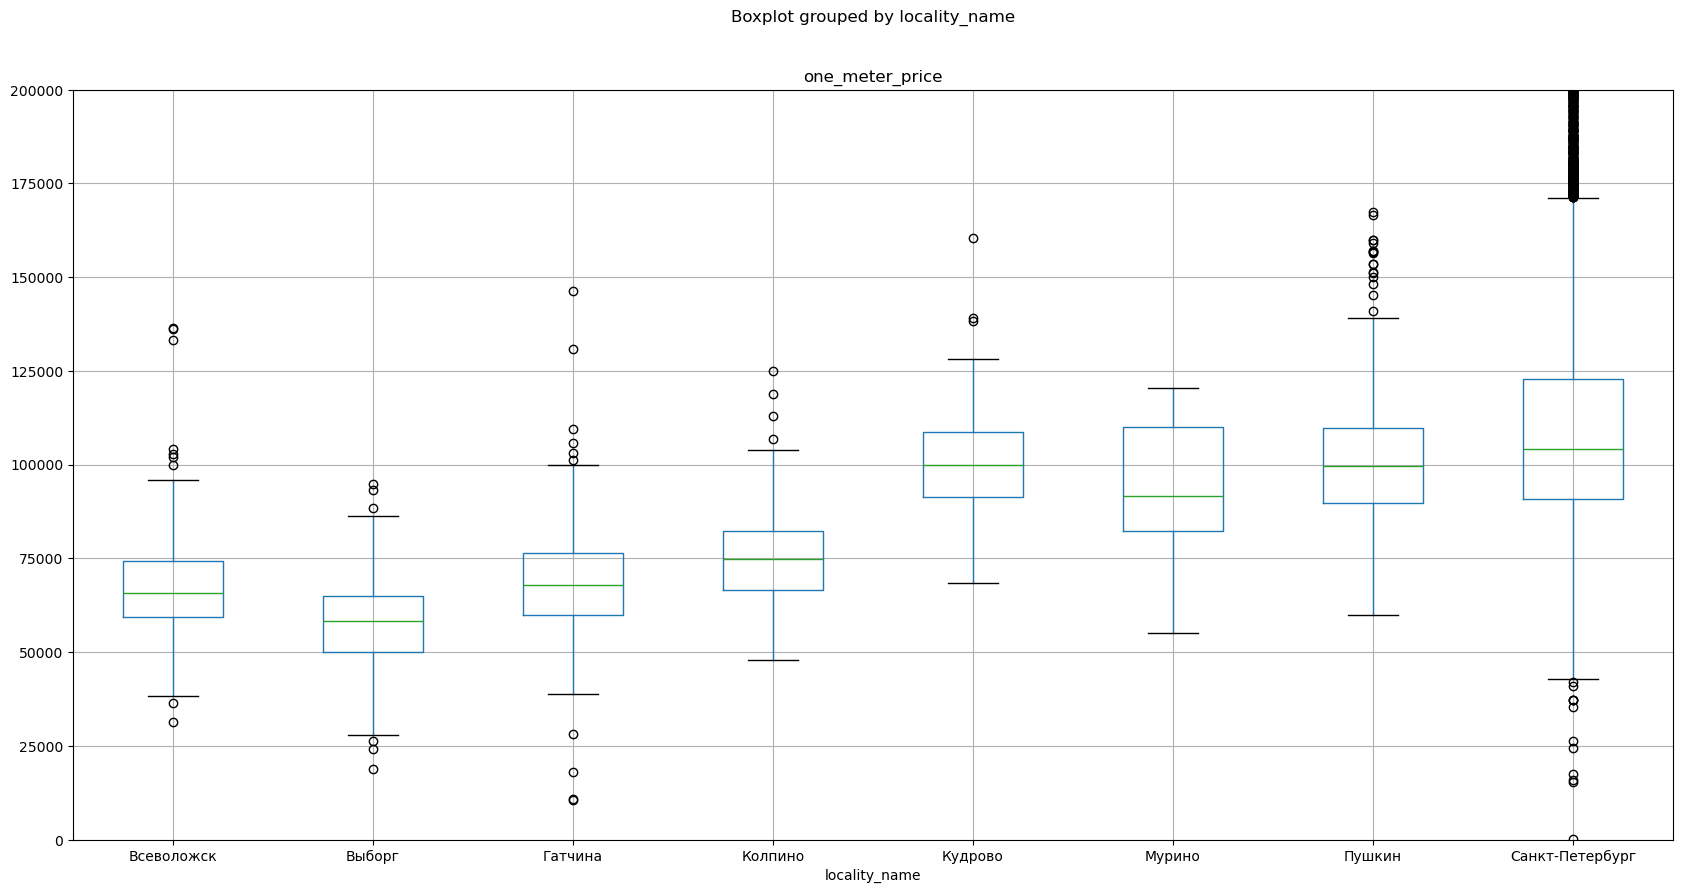

In [90]:
ax = (data
    .query('locality_name in @average_price_top10.location')
    .boxplot('one_meter_price', by='locality_name', figsize=(20, 10))
)
ax.set_ylim(0, 200000)

Определем населенные пункты с самой большой стоимостью квадратного метра:

In [91]:
dt_announcements_number.sort_values(by='average_price', ascending=False).head(10)

,location,number_of_announcements,average_price
64,Зеленогорск,23,117810
222,Санкт-Петербург,14953,111768
201,Пушкин,355,102610
235,Сестрорецк,181,102107
122,Лисий Нос,3,100660
141,Мистолово,11,98549
116,Левашово,1,96997
105,Кудрово,472,95324
169,Парголово,325,90317
254,Стрельна,41,89182


Определим населенные пункты с самой низкой стоимостью квадратного метра:

In [92]:
dt_announcements_number.sort_values(by='average_price').head(10)

,location,number_of_announcements,average_price
250,Старополье,3,11206
226,Свирь,2,11481
24,Вахнова Кара,1,11688
37,Выскатка,2,12335
242,Совхозный,2,12628
131,Малая Романовка,1,12724
267,Тесово-4,1,12931
17,Бор,1,13157
237,Сижно,1,13709
300,Ям-Тесово,2,13711


Дешевле всего в Старополье, дороже всего в Зеленогорске и СПб.

**Мини-вывод**

Больше всего объявлений о продаже квартиры были размещены в Санкт-Петербурге (15621 шт.). Далее по списку с сильным и закономерным отставанием располжились такие н. п., как Мурино (587 шт.), Кудрово (472 шт.) и т.д.  
Самая дорогая цена квадратного метра квартиры в Зеленогорске и Санкт-Петербурге - 115122р и 114154р соответственно.  
Самая дешевая цена квадратного метра квартиры зафиксирована в Старополье - 11206р за кв. м.

### Cредняя цена каждого километра в СПб. Зависимость стоимости объекта от расстояния до центра

Создадим таблицу куда будем вносить КМ и какая у него средняя цена:

In [93]:
dt_average_km = {'km' : [], 'average_price' : []}

Cоздадим далее цикл, который добавляет в таблицу значения километра и то, какая средняя цена у квартир в Спб, которые на столько отдалены от центра города:

In [94]:
for km in sorted(data['city_centers_nearest_km'].value_counts().index):
    dt_average_km['km'].append(km)
    dt_average_km['average_price'].append(data[(data['city_centers_nearest_km'] == km) & (data['locality_name_new'] == 'Санкт-Петербург')]['last_price'].mean())
dt_average_km = pd.DataFrame(dt_average_km)
dt_average_km.head()

,km,average_price
0,0.0,1.453302e+07
1,1.0,1.159898e+07
2,2.0,1.081383e+07
3,3.0,9.727304e+06
4,4.0,1.058211e+07


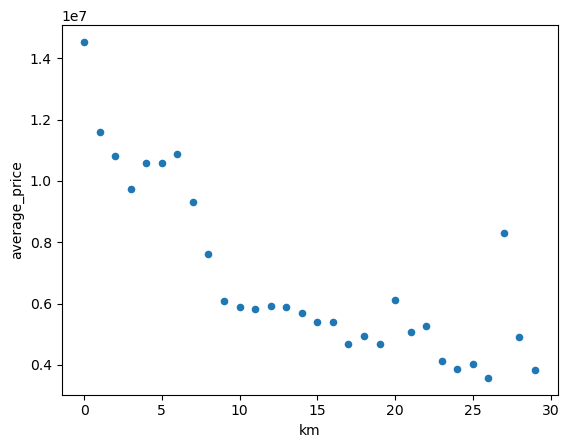

In [95]:
dt_average_km.plot(x='km', y='average_price', kind='scatter') 
plt.show()

In [96]:
dt_average_km['km'].corr(dt_average_km['average_price'])

-0.820591207060351

**Мини-вывод**

Как можно заметить, чем дальше квартира от центра, тем она дешевле. График также подтверждает данный тезис. Отрицательная высокая корреляция (-0.82) тоже подтверждает данную связь.

## Вывод <a id=6> </a>

В исследовании анализировали **данные о продаже квартир** с целью установить параметры для автоматизированной системы отслеживания аномалий и выявить закономерности.

Предварительно данные были обработаны: заполнены пропущенные значения, устранены неявные дубликаты в названиях населенных пунктов, исправлены некорректные типы данных, обработаны выбивающиеся значения.

Далее данные были расширены новыми столбцами:

1) Рассчитана цена за квадратный метр.  
2) Добавлены год, месяц и неделя публикации объявления.  
3) Включен тип этажа квартиры.  
4) Рассчитано расстояние до центра города в километрах.  
5) Затем проведено изучение параметров:
------------- 
- Средняя площадь квартиры составляет `59 кв. м`, медианная - `52 кв. м`, с наиболее популярной площадью около `45 кв. м.`
- Средняя жилая площадь - `34 кв. м`, медианная - `30 кв. м`, преобладает в населенном пункте "Бор", доля в Санкт-Петербурге `57%`.
- Средняя кухонная площадь - `10 кв. м`, медианная - `9 кв. м`, наибольшая в "Боре", доля в Санкт-Петербурге `18%`.
- Средняя цена - `6.38 млн руб`, медианная - `4.6 млн руб`, дорогие квартиры в Санкт-Петербурге, преобладают `2-3 комнатные`.
- Средняя высота потолков - `2.7 м`, часто `3 м` и выше, типы домов - пяти- и девятиэтажки.
- Продаваемые квартиры в основном в `5-20 км` от центра, популярная дистанция `11-12 км` в Санкт-Петербурге.
- Большинство квартир в `1 км` от парка. Активные дни объявлений - вторник и четверг, менее популярные - суббота и воскресенье. Активные месяцы - февраль и март.
- Большинство квартир продается за `100 дней`, `75%` - до `231 дня`, долгие продажи в Санкт-Петербурге (максимум `1580 дней`).
- Основное влияние на цену - площадь (`корреляция 0.7`) и год размещения (особенно `2014`). Другие факторы менее важны.
- Больше всего объявлений в `Санкт-Петербурге`, высокие цены за метр в `Зеленогорске` и `Санкт-Петербурге`, низкие - в `Старополье`.
- Чем дальше от центра, тем дешевле (`корреляция -0.8`).